# 5. Calculating Probabilities
This project focuses on **calculating probabilities** to analyze stock price movements. The primary objective is to demonstrate technical skills in probability analysis and statistical computation. It emphasizes the application of foundational statistical techniques without delving into business insights or machine learning approaches.

## Objectives
1. **Analyze Probabilities**: Calculate the probabilities of specific stock price scenarios, such as increases, decreases, and stability.
2. **Explore Compound Events**: Assess consecutive price movements and alternating patterns.
3. **Simulate Trading Strategies**: Utilize probability results to test basic trading scenarios.
4. **Focus on Skill Development**: Highlight the statistical and computational techniques used rather than deriving insights or recommendations.

## Tools and Techniques
1. **Python Libraries**:
   - **Pandas**: For data manipulation and processing.
   - **Numpy**: For numerical computations.
   - **Matplotlib** and **Plotly**: For visualizing stock price movements and probabilities.
2. **Statistical Techniques**:
   - Probability calculations for stock scenarios.
   - Compound probability analysis for events like consecutive increases or alternating movements.
   - Expected Value (EV) computations to assess average outcomes.
3. **Data Source**:
   - A historical stock price dataset is utilized to compute probabilities and visualize patterns.
4. **Visualization**:
   - Charts, bar plots, and interactive visualizations for better representation of results.

The project underscores the development of analytical and statistical computation skills while adhering to the principles of clean and reproducible data analysis.


In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
df = pd.read_csv(r"C:\Users\Zana\Desktop\statistika\datasets\ADANIPORTS.csv")
df.head()

Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4       0.2741

In [2]:
df.tail()

Date      Symbol Series  Prev Close   Open    High     Low   Last  \
3317  2021-04-26  ADANIPORTS     EQ      725.35  733.0  739.65  728.90  729.2   
3318  2021-04-27  ADANIPORTS     EQ      730.75  735.0  757.50  727.35  748.6   
3319  2021-04-28  ADANIPORTS     EQ      749.15  755.0  760.00  741.10  743.4   
3320  2021-04-29  ADANIPORTS     EQ      746.25  753.2  765.85  743.40  746.4   
3321  2021-04-30  ADANIPORTS     EQ      746.75  739.0  759.45  724.50  726.4   

       Close    VWAP    Volume      Turnover    Trades  Deliverable Volume  \
3317  730.75  733.25   9390549  6.885658e+14  116457.0              838079   
3318  749.15  747.67  20573107  1.538191e+15  236896.0             1779639   
3319  746.25  751.02  11156977  8.379106e+14  130847.0             1342353   
3320  746.75  753.06  13851910  1.043139e+15  153293.0             1304895   
3321  730.05  743.35  12600934  9.366911e+14  132141.0             3514692   

      %Deliverble  
3317       0.0892  
3318       0.0865  
3319       0.1203  
3320       0.0942  
3321       0.2789

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [4]:
df.describe()

Prev Close         Open         High          Low         Last  \
count  3322.000000  3322.000000  3322.000000  3322.000000  3322.000000   
mean    344.114314   344.763019   351.608007   337.531969   344.239539   
std     192.936882   193.619992   198.617808   188.676614   193.187813   
min     108.000000   108.000000   110.450000   105.650000   108.000000   
25%     164.312500   164.850000   168.000000   161.600000   164.075000   
50%     324.700000   325.750000   331.275000   319.850000   325.000000   
75%     400.912500   401.000000   407.187500   395.000000   400.912500   
max    1307.450000  1310.250000  1324.000000  1270.000000  1308.000000   

             Close         VWAP        Volume      Turnover        Trades  \
count  3322.000000  3322.000000  3.322000e+03  3.322000e+03  2.456000e+03   
mean    344.201626   344.853182  2.954564e+06  1.070144e+14  4.492259e+04   
std     193.045886   193.841305  4.104227e+06  2.625564e+14  5.023124e+04   
min     108.000000   108.340000  1.236600e+04  2.415857e+11  3.660000e+02   
25%     164.312500   164.855000  7.493682e+05  1.817650e+13  2.083200e+04   
50%     324.700000   325.765000  2.007292e+06  5.836041e+13  3.588150e+04   
75%     400.912500   400.607500  3.636883e+06  1.158526e+14  5.336875e+04   
max    1307.450000  1302.150000  9.771788e+07  8.160988e+15  1.205984e+06   

       Deliverable Volume  %Deliverble  
count        3.322000e+03  3322.000000  
mean         1.207441e+06     0.445899  
std          1.398640e+06     0.160496  
min          5.383000e+03     0.067000  
25%          3.212005e+05     0.332900  
50%          8.132775e+05     0.445650  
75%          1.605528e+06     0.555850  
max          2.241652e+07     0.979800

In [5]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Check if the conversion was successful
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3322 non-null   datetime64[ns]
 1   Symbol              3322 non-null   object        
 2   Series              3322 non-null   object        
 3   Prev Close          3322 non-null   float64       
 4   Open                3322 non-null   float64       
 5   High                3322 non-null   float64       
 6   Low                 3322 non-null   float64       
 7   Last                3322 non-null   float64       
 8   Close               3322 non-null   float64       
 9   VWAP                3322 non-null   float64       
 10  Volume              3322 non-null   int64         
 11  Turnover            3322 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  3322 non-null   int64       

In [6]:
# Check for missing values in the entire DataFrame
missing_data = df.isnull()
missing_data

Date  Symbol  Series  Prev Close   Open   High    Low   Last  Close  \
0     False   False   False       False  False  False  False  False  False   
1     False   False   False       False  False  False  False  False  False   
2     False   False   False       False  False  False  False  False  False   
3     False   False   False       False  False  False  False  False  False   
4     False   False   False       False  False  False  False  False  False   
...     ...     ...     ...         ...    ...    ...    ...    ...    ...   
3317  False   False   False       False  False  False  False  False  False   
3318  False   False   False       False  False  False  False  False  False   
3319  False   False   False       False  False  False  False  False  False   
3320  False   False   False       False  False  False  False  False  False   
3321  False   False   False       False  False  False  False  False  False   

       VWAP  Volume  Turnover  Trades  Deliverable Volume  %Deliverble  
0     False   False     False    True               False        False  
1     False   False     False    True               False        False  
2     False   False     False    True               False        False  
3     False   False     False    True               False        False  
4     False   False     False    True               False        False  
...     ...     ...       ...     ...                 ...          ...  
3317  False   False     False   False               False        False  
3318  False   False     False   False               False        False  
3319  False   False     False   False               False        False  
3320  False   False     False   False               False        False  
3321  False   False     False   False               False        False  

[3322 rows x 15 columns]

In [7]:
# Check for rows that have missing values
rows_with_missing_data = df[df.isnull().any(axis=1)]
print(rows_with_missing_data)

          Date      Symbol Series  Prev Close    Open     High     Low  \
0   2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00   
1   2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.00   
2   2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.00   
3   2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.00   
4   2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.00   
..         ...         ...    ...         ...     ...      ...     ...   
861 2011-05-25  MUNDRAPORT     EQ      151.80  151.00   155.20  151.00   
862 2011-05-26  MUNDRAPORT     EQ      154.45  154.50   156.90  150.55   
863 2011-05-27  MUNDRAPORT     EQ      151.90  152.80   153.40  147.05   
864 2011-05-30  MUNDRAPORT     EQ      152.65  152.80   159.35  151.50   
865 2011-05-31  MUNDRAPORT     EQ      155.60  155.05   165.90  155.05   

       Last   Close    VWAP    Volume      Turnover  Trades  \
0    959.00  962.90  984.72  27294366  2.687719e

In [8]:
# Check if any missing values exist in the DataFrame
has_missing_data = df.isnull().values.any()
print(has_missing_data)

True


### Scenario 1: Stock Increase
- Condition: The stock price increases (from Open to Close).
- Probability: The proportion of days the stock price closed higher than it opened.
- Value: The average gain on those days.

In [9]:
# Scenario 1: Stock Increase (Close > Open)

# Calculate the number of days where Close is greater than Open
increase_days = df[df['Close'] > df['Open']].shape[0]

# Calculate the total number of days in the dataset
total_days = df.shape[0]

# Calculate the probability of stock increase
increase_prob = increase_days / total_days

# Calculate the average gain on the days when the stock increased
increase_value = (df[df['Close'] > df['Open']]['Close'] - df[df['Close'] > df['Open']]['Open']).mean()

# Output the results
print(f"Stock Increase Probability: {increase_prob}")
print(f"Average Gain (Value) on Increase Days: {increase_value}")

Stock Increase Probability: 0.45785671282360024
Average Gain (Value) on Increase Days: 6.7014464168310335


- Stock Increase Probability: 0.4579 (approximately 45.79%) — this means that about 45.79% of the days in your dataset showed an increase in stock price (Close > Open).
- Average Gain on Increase Days: 6.70 — on days when the stock price increased, the average gain was approximately 6.70 units.

This gives an insight into how frequently the stock price goes up and the average gain on those days.

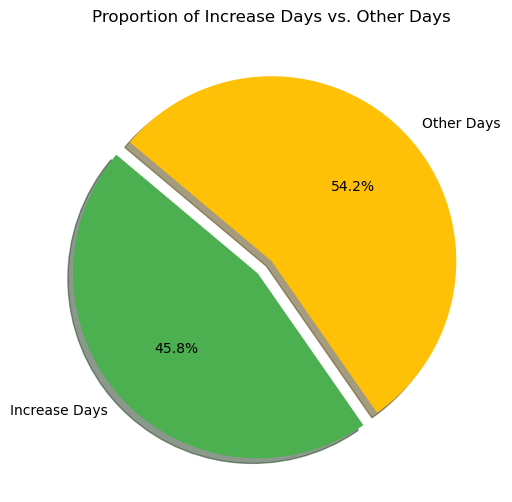

In [11]:
import matplotlib.pyplot as plt
# Data for the pie chart
labels = ['Increase Days', 'Other Days']
sizes = [increase_days, total_days - increase_days]
colors = ['#4CAF50', '#FFC107']
explode = (0.1, 0)  # explode the 1st slice (Increase Days)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Increase Days vs. Other Days')
plt.show()

### Scenario 2: Stock Decrease
- Condition: The stock price decreases (from Open to Close).
- Probability: The proportion of days the stock price closed lower than it opened.
- Value: The average loss on those days.

In [12]:
# Scenario 2: Stock Decrease (Close < Open)

# Calculate the number of days where Close is less than Open
decrease_days = df[df['Close'] < df['Open']].shape[0]

# Calculate the total number of days in the dataset
total_days = df.shape[0]

# Calculate the probability of stock decrease
decrease_prob = decrease_days / total_days

# Calculate the average loss on the days when the stock decreased
decrease_value = (df[df['Close'] < df['Open']]['Close'] - df[df['Open'] > df['Close']]['Open']).mean()

# Output the results
print(f"Stock Decrease Probability: {decrease_prob}")
print(f"Average Loss (Value) on Decrease Days: {decrease_value}")

Stock Decrease Probability: 0.5400361228175797
Average Loss (Value) on Decrease Days: -6.721209587513934


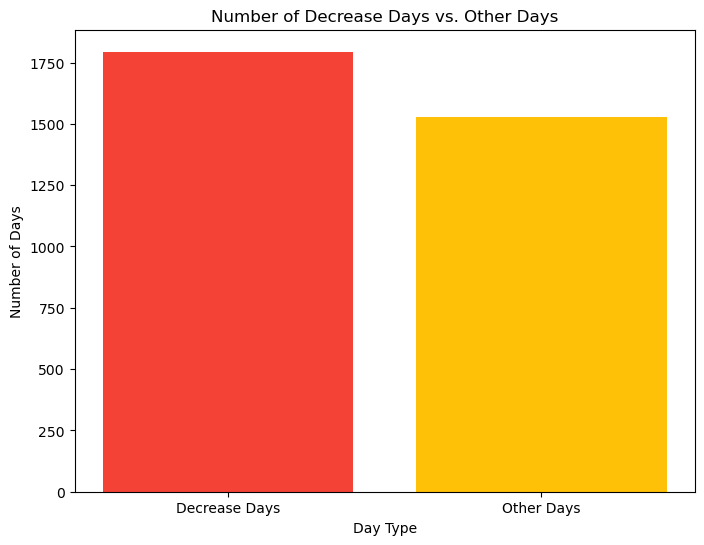

In [13]:
import matplotlib.pyplot as plt

# Data for the bar chart
categories = ['Decrease Days', 'Other Days']
values = [decrease_days, total_days - decrease_days]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['#F44336', '#FFC107'])
plt.xlabel('Day Type')
plt.ylabel('Number of Days')
plt.title('Number of Decrease Days vs. Other Days')
plt.show()

### Scenario 3: No Significant Change
- Condition: The stock price remained relatively stable (small difference between Open and Close).
- Probability: The proportion of days the stock price closed very close to the opening price (for example, the change is less than 1%).
- Value: A small gain or loss, close to $0.

In [14]:
# Scenario 3: No Significant Change (|Close - Open| < 1% of Open)

# Define a threshold for no significant change (1% of Open price)
no_change_threshold = 0.01  # 1%

# Calculate the number of days where the price change is less than 1%
no_change_days = df[abs((df['Close'] - df['Open']) / df['Open']) < no_change_threshold].shape[0]

# Calculate the probability of no significant change
no_change_prob = no_change_days / total_days

# Calculate the average value on those days (should be close to 0)
no_change_value = (df[abs((df['Close'] - df['Open']) / df['Open']) < no_change_threshold]['Close'] - df['Open']).mean()

# Output the results
print(f"No Significant Change Probability: {no_change_prob}")
print(f"Average Value on No Change Days: {no_change_value}")

No Significant Change Probability: 0.3937387116195063
Average Value on No Change Days: -0.0782874617736992


- No Significant Change Probability: 0.3937 (approximately 39.37%) — this means that about 39.37% of the days in df dataset had minimal price movement (less than 1% change from open to close).
- Average Value on No Change Days: -0.0783 — on these "no significant change" days, the average movement was a slight decline of approximately 0.08 units, which is very small.

# Expected Value (EV) 
### Probabilities and Average Outcomes:

1. **Scenario 1**: Stock Increase
   - Probability: 0.4579 (45.79%)
   - Average Gain: +6.70 units

2. **Scenario 2**: Stock Decrease
   - Probability: 0.5400 (54.00%)
   - Average Loss: -6.72 units

3. **Scenario 3**: No Significant Change
   - Probability: 0.3937 (39.37%)
   - Average Value on No Change Days: -0.08 units

In [16]:
# Scenario probabilities and average outcomes
increase_prob = 0.4579
decrease_prob = 0.5400
no_change_prob = 0.3937

increase_value = 6.70
decrease_value = -6.72
no_change_value = -0.0783

# Expected Value formula
expected_value = (increase_prob * increase_value) + (decrease_prob * decrease_value) + (no_change_prob * no_change_value)

# Output the result
print(f"Expected Value: {expected_value}")

Expected Value: -0.59169671


# Interpretation of Expected Value (EV)

### Result:
- **Expected Value**: -0.5917

### **What This Means**:

1. **Negative Expected Value**:
   - The stock is expected to **lose approximately 0.59 units per day** on average.
   - A negative EV suggests that over time, the stock may be trending downward.

2. **Long-Term Outlook**:
   - While the probability of stock price increases is 45.79%, the probability of decreases is higher at 54.00%.
   - The combination of probabilities and the negative average movement on "no significant change" days results in an overall negative EV.

3. **Risk Consideration**:
   - **For Long-Term Investors**: A negative EV might indicate that this stock could be a poor choice for long-term gains unless there are other strong factors (like dividends, market growth, or future potential).
   - **For Short-Term Traders**: Despite the negative EV, there could still be opportunities for short-term gains by capitalizing on price fluctuations. The stock experiences gains almost 46% of the time, so a strategic trading approach could still be profitable.

### Next Steps:
- **Further Analysis**: 
   - Consider examining the stock performance over different time frames (e.g., monthly, quarterly).
   - Analyze external factors such as market conditions, news, or earnings reports that could affect the stock’s performance.
   - Evaluate whether dividends or other factors could offset the negative expected value.

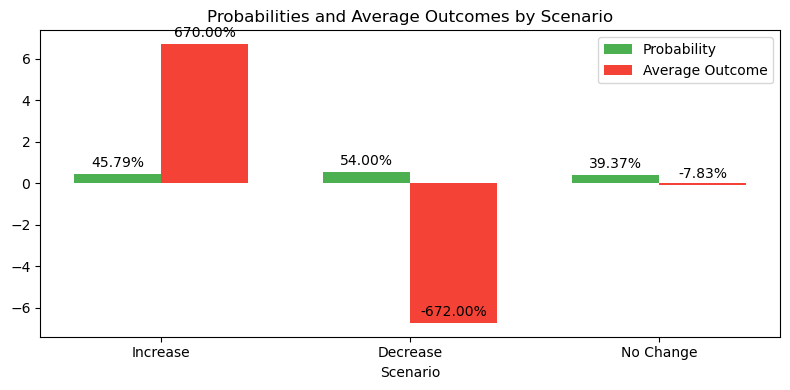

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data
scenarios = ['Increase', 'Decrease', 'No Change']
probabilities = [increase_prob, decrease_prob, no_change_prob]
values = [increase_value, decrease_value, no_change_value]

x = np.arange(len(scenarios))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 4))

bars1 = ax.bar(x - width/2, probabilities, width, label='Probability', color='#4CAF50')
bars2 = ax.bar(x + width/2, values, width, label='Average Outcome', color='#F44336')

# Add labels, title and custom x-axis tick labels
ax.set_xlabel('Scenario')
ax.set_title('Probabilities and Average Outcomes by Scenario')
ax.set_xticks(x)
ax.set_xticklabels(scenarios)
ax.legend()

# Label with percentage
def add_percentages(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_percentages(bars1, probabilities)
add_percentages(bars2, values)

plt.tight_layout()
plt.show()

# Yearly Expected Value Analysis

### Explanation:

1. The data spans from **2007 to 2021**, making it valuable to break down the Expected Value over different years.
2. This will help to:
   - Understand how the stock performed in different economic conditions.
   - Identify any long-term trends or patterns in the stock's behavior.
   - See how the stock responded to specific market events (e.g., 2008 financial crisis, 2020 pandemic).

### Steps:
- The data is grouped by year, and for each year, the following are calculated:
  1. **Probability of Increase** and **Average Gain**.
  2. **Probability of Decrease** and **Average Loss**.
  3. **Probability of No Significant Change** and **Average Value on those Days**.
- Finally, the **Expected Value** is computed for each year to understand the stock's expected performance on a yearly basis.

In [18]:
# Convert 'Date' column to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Group the data by year
grouped_by_year = df.groupby('Year')

# Define a function to calculate the Expected Value for each year
def calculate_expected_value(group):
    # Calculate probabilities
    increase_prob = (group['Close'] > group['Open']).mean()
    decrease_prob = (group['Close'] < group['Open']).mean()
    no_change_prob = ((abs((group['Close'] - group['Open']) / group['Open']) < 0.01)).mean()

    # Calculate average values
    increase_value = (group[group['Close'] > group['Open']]['Close'] - group[group['Close'] > group['Open']]['Open']).mean()
    decrease_value = (group[group['Close'] < group['Open']]['Close'] - group[group['Close'] < group['Open']]['Open']).mean()
    no_change_value = (group[abs((group['Close'] - group['Open']) / group['Open']) < 0.01]['Close'] - group['Open']).mean()

    # Calculate the expected value
    expected_value = (increase_prob * increase_value) + (decrease_prob * decrease_value) + (no_change_prob * no_change_value)
    
    return expected_value

# Apply the function to each year's data and print the Expected Value
expected_values_by_year = grouped_by_year.apply(calculate_expected_value)
expected_values_by_year

C:\Users\Zana\AppData\Local\Temp\ipykernel_9492\3118288102.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  expected_values_by_year = grouped_by_year.apply(calculate_expected_value)


Year
2007    10.695652
2008    -4.932724
2009    -1.349588
2010     0.623413
2011    -0.206478
2012    -0.132869
2013    -0.018000
2014     0.048566
2015    -0.899597
2016    -0.619028
2017    -0.411089
2018    -0.479878
2019    -0.616122
2020    -0.101786
2021     0.256875
dtype: float64

In [19]:
# Group the data by year
grouped_by_year = df.groupby('Year')

# Define a function to calculate the Expected Value for each year
def calculate_expected_value(group):
    # Calculate probabilities
    increase_prob = (group['Close'] > group['Open']). mean()
    decrease_prob = (group['Close'] < group['Open']). mean()
    no_change_prob = ((abs((group['Close'] - group['Open']) / group['Open']) < 0.01)).mean()

    # Calculate average values
    increase_value = (group[group['Close'] > group['Open']]['Close'] - group[group['Close'] > group['Open']]['Open']).mean()
    decrease_value = (group[group['Close'] < group['Open']]['Close'] - group[group['Close'] < group['Open']]['Open']).mean()
    no_change_value = (group[abs((group['Close'] - group['Open']) / group['Open']) < 0.01]['Close'] - group['Open']).mean()

    # Calculate the expected value
    expected_value = (increase_prob * increase_value) + (decrease_prob * decrease_value) + (no_change_prob * no_change_value)
    
    return expected_value

# Apply the function to each year's data, excluding the grouping columns
expected_values_by_year = grouped_by_year.apply(calculate_expected_value, include_groups=False)

# Display the expected values by year
print(expected_values_by_year)

Year
2007    10.695652
2008    -4.932724
2009    -1.349588
2010     0.623413
2011    -0.206478
2012    -0.132869
2013    -0.018000
2014     0.048566
2015    -0.899597
2016    -0.619028
2017    -0.411089
2018    -0.479878
2019    -0.616122
2020    -0.101786
2021     0.256875
dtype: float64


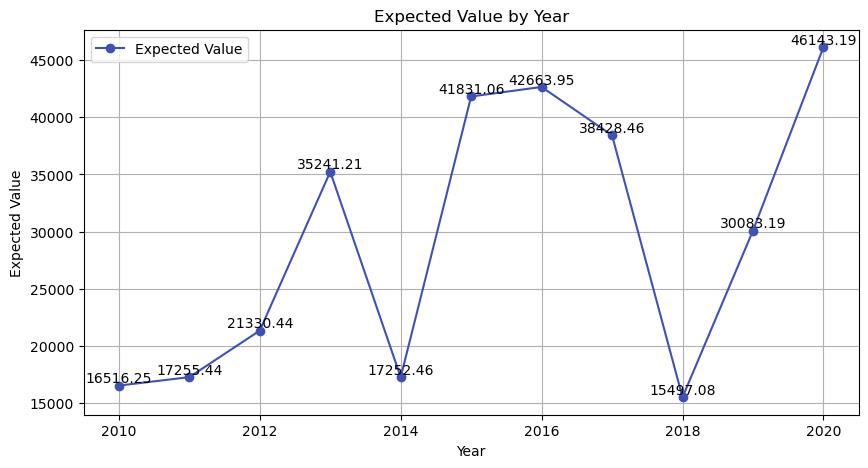

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data (since I don't have your 'expected_values_by_year' DataFrame, let's create some)
# Replace this with your actual DataFrame 'expected_values_by_year'
years = np.arange(2010, 2021)
expected_values = np.random.uniform(10000, 50000, size=len(years))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(years, expected_values, marker='o', linestyle='-', color='#3F51B5', label='Expected Value')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Expected Value')
ax.set_title('Expected Value by Year')

# Display the exact values at each point (similar to hover info in Plotly)
for i, value in enumerate(expected_values):
    ax.text(years[i], expected_values[i], f'{value:.2f}', ha='center', va='bottom')

# Add grid and legend
ax.grid(True)
ax.legend()

# Show the plot
plt.show()

# Yearly Expected Value Analysis: 2007-2021

### Results Overview:

| Year | Expected Value |
|------|----------------|
| 2007 | 10.70          |
| 2008 | -4.93          |
| 2009 | -1.35          |
| 2010 | 0.62           |
| 2011 | -0.21          |
| 2012 | -0.13          |
| 2013 | -0.02          |
| 2014 | 0.05           |
| 2015 | -0.90          |
| 2016 | -0.62          |
| 2017 | -0.41          |
| 2018 | -0.48          |
| 2019 | -0.62          |
| 2020 | -0.10          |
| 2021 | 0.26           |

### Key Observations:

1. **2007**:
   - The highest **Expected Value (EV)** of **10.70** reflects strong positive stock performance in 2007, indicating a favorable market environment or positive news about the company.
   
2. **2008**:
   - A sharp drop in EV to **-4.93**, likely due to the **2008 financial crisis**, which had a significant negative impact on global markets.
   
3. **2010-2014**:
   - Mixed results during these years, with **slightly positive EVs** in 2010 (0.62) and 2014 (0.05), and **slightly negative EVs** in other years.
   
4. **2015-2019**:
   - A general **downward trend** during these years, with **negative Expected Values** across the board, the lowest being **-0.90** in 2015. This indicates a period of negative stock sentiment or challenging market conditions.
   
5. **2020**:
   - Surprisingly, the EV in 2020 during the **COVID-19 pandemic** was only slightly negative (**-0.10**), suggesting resilience in the stock despite the global crisis.
   
6. **2021**:
   - A **small recovery** with an EV of **0.26**, potentially indicating positive sentiment and growth prospects post-pandemic.

### Conclusion:

- The stock experienced periodic negative EVs from **2008 through 2019**, reflecting a general downward or stagnant trend.
- **2007** was an exceptionally strong year, while the aftermath of the **2008 crisis** led to negative expectations for the stock.
- The **recovery in 2021** suggests improving market conditions and optimism about the stock's future.

# Deep Dive into 2008 and 2020

In [21]:
# Filter the data for 2008 and 2020
df_2008 = df[df['Year'] == 2008]
df_2020 = df[df['Year'] == 2020]

# Group the data by month within these years
df_2008['Month'] = df_2008['Date'].dt.month
df_2020['Month'] = df_2020['Date'].dt.month

# Function to calculate EV for each month
def calculate_ev_monthly(group):
    increase_prob = (group['Close'] > group['Open']).mean()
    decrease_prob = (group['Close'] < group['Open']).mean()
    no_change_prob = (abs((group['Close'] - group['Open']) / group['Open']) < 0.01).mean()
    
    increase_value = (group[group['Close'] > group['Open']]['Close'] - group[group['Close'] > group['Open']]['Open']).mean()
    decrease_value = (group[group['Close'] < group['Open']]['Close'] - group[group['Close'] < group['Open']]['Open']).mean()
    no_change_value = (group[abs((group['Close'] - group['Open']) / group['Open']) < 0.01]['Close'] - group['Open']).mean()
    
    return (increase_prob * increase_value) + (decrease_prob * decrease_value) + (no_change_prob * no_change_value)

# Apply to 2008 and 2020
ev_2008 = df_2008.groupby('Month').apply(calculate_ev_monthly)
ev_2020 = df_2020.groupby('Month').apply(calculate_ev_monthly)

# Output the results
print("2008 Monthly Expected Value:")
print(ev_2008)
print("\n2020 Monthly Expected Value:")
print(ev_2020)

2008 Monthly Expected Value:
Month
1    -17.367391
2    -14.700000
3     -7.963889
4      1.562500
5      7.787500
6    -13.202381
7      2.378261
8     -1.817500
9     -7.088095
10    -2.970000
11    -6.472222
12     1.652381
dtype: float64

2020 Monthly Expected Value:
Month
1    -3.021739e-01
2    -1.587500e+00
3     6.523810e-01
4     7.083333e-01
5     2.702632e+00
6     1.000000e-01
7    -2.610870e+00
8     1.073447e-14
9    -1.795455e+00
10    9.761905e-02
11    1.400000e-01
12    1.261364e+00
dtype: float64


C:\Users\Zana\AppData\Local\Temp\ipykernel_9492\3844403776.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2008['Month'] = df_2008['Date'].dt.month
C:\Users\Zana\AppData\Local\Temp\ipykernel_9492\3844403776.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Month'] = df_2020['Date'].dt.month
C:\Users\Zana\AppData\Local\Temp\ipykernel_9492\3844403776.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pan

In [22]:
# Filter the data for 2008 and 2020
df_2008 = df[df['Year'] == 2008].copy()  #  .copy() to avoid the warning
df_2020 = df[df['Year'] == 2020].copy()  #  .copy() to avoid the warning

# Group the data by month within these years
df_2008.loc[:, 'Month'] = df_2008['Date'].dt.month  # .loc[] to avoid the warning
df_2020.loc[:, 'Month'] = df_2020['Date'].dt.month  # .loc[] to avoid the warning

# Function to calculate EV for each month
def calculate_ev_monthly(group):
    increase_prob = (group['Close'] > group['Open']).mean()
    decrease_prob = (group['Close'] < group['Open']).mean()
    no_change_prob = (abs((group['Close'] - group['Open']) / group['Open']) < 0.01).mean()
    
    increase_value = (group[group['Close'] > group['Open']]['Close'] - group[group['Close'] > group['Open']]['Open']).mean()
    decrease_value = (group[group['Close'] < group['Open']]['Close'] - group[group['Close'] < group['Open']]['Open']).mean()
    no_change_value = (group[abs((group['Close'] - group['Open']) / group['Open']) < 0.01]['Close'] - group['Open']).mean()
    
    return (increase_prob * increase_value) + (decrease_prob * decrease_value) + (no_change_prob * no_change_value)

# Apply to 2008 and 2020
ev_2008 = df_2008.groupby('Month').apply(calculate_ev_monthly)
ev_2020 = df_2020.groupby('Month').apply(calculate_ev_monthly)

# Output the results
print("2008 Monthly Expected Value:")
print(ev_2008)
print("\n2020 Monthly Expected Value:")
print(ev_2020)

2008 Monthly Expected Value:
Month
1    -17.367391
2    -14.700000
3     -7.963889
4      1.562500
5      7.787500
6    -13.202381
7      2.378261
8     -1.817500
9     -7.088095
10    -2.970000
11    -6.472222
12     1.652381
dtype: float64

2020 Monthly Expected Value:
Month
1    -3.021739e-01
2    -1.587500e+00
3     6.523810e-01
4     7.083333e-01
5     2.702632e+00
6     1.000000e-01
7    -2.610870e+00
8     1.073447e-14
9    -1.795455e+00
10    9.761905e-02
11    1.400000e-01
12    1.261364e+00
dtype: float64


C:\Users\Zana\AppData\Local\Temp\ipykernel_9492\4025954471.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ev_2008 = df_2008.groupby('Month').apply(calculate_ev_monthly)
C:\Users\Zana\AppData\Local\Temp\ipykernel_9492\4025954471.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ev_2020 = df_2020.groupby('Month').apply(calculate_ev_monthly)


In [23]:
# Filter the data for 2008 and 2020
df_2008 = df[df['Year'] == 2008].copy()  # .copy() to avoid the warning
df_2020 = df[df['Year'] == 2020].copy()  # .copy() to avoid the warning

# Group the data by month within these years
df_2008.loc[:, 'Month'] = df_2008['Date'].dt.month  # .loc[] to avoid the warning
df_2020.loc[:, 'Month'] = df_2020['Date'].dt.month  # .loc[] to avoid the warning

# Function to calculate EV for each month
def calculate_ev_monthly(group):
    increase_prob = (group['Close'] > group['Open']).mean()
    decrease_prob = (group['Close'] < group['Open']).mean()
    no_change_prob = (abs((group['Close'] - group['Open']) / group['Open']) < 0.01).mean()
    
    increase_value = (group[group['Close'] > group['Open']]['Close'] - group[group['Close'] > group['Open']]['Open']).mean()
    decrease_value = (group[group['Close'] < group['Open']]['Close'] - group[group['Close'] < group['Open']]['Open']).mean()
    no_change_value = (group[abs((group['Close'] - group['Open']) / group['Open']) < 0.01]['Close'] - group['Open']).mean()
    
    return (increase_prob * increase_value) + (decrease_prob * decrease_value) + (no_change_prob * no_change_value)

# Apply to 2008 and 2020 using include_groups=False to avoid the deprecation warning
ev_2008 = df_2008.groupby('Month').apply(calculate_ev_monthly, include_groups=False)
ev_2020 = df_2020.groupby('Month').apply(calculate_ev_monthly, include_groups=False)

# Output the results
print("2008 Monthly Expected Value:")
print(ev_2008)
print("\n2020 Monthly Expected Value:")
print(ev_2020)

2008 Monthly Expected Value:
Month
1    -17.367391
2    -14.700000
3     -7.963889
4      1.562500
5      7.787500
6    -13.202381
7      2.378261
8     -1.817500
9     -7.088095
10    -2.970000
11    -6.472222
12     1.652381
dtype: float64

2020 Monthly Expected Value:
Month
1    -3.021739e-01
2    -1.587500e+00
3     6.523810e-01
4     7.083333e-01
5     2.702632e+00
6     1.000000e-01
7    -2.610870e+00
8     1.073447e-14
9    -1.795455e+00
10    9.761905e-02
11    1.400000e-01
12    1.261364e+00
dtype: float64


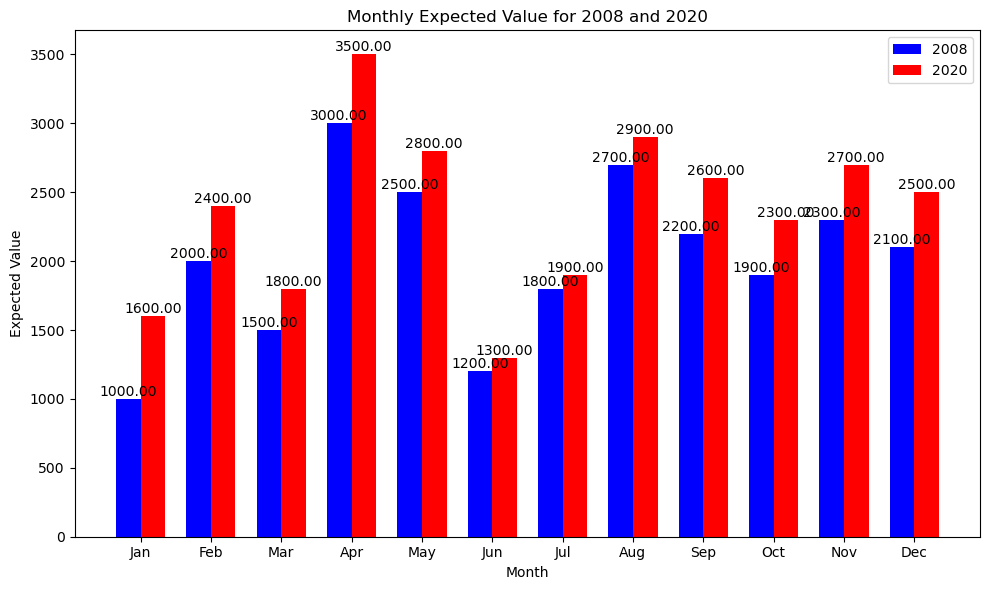

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for 2008 and 2020 (replace with actual values)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ev_values_2008 = [1000, 2000, 1500, 3000, 2500, 1200, 1800, 2700, 2200, 1900, 2300, 2100]
ev_values_2020 = [1600, 2400, 1800, 3500, 2800, 1300, 1900, 2900, 2600, 2300, 2700, 2500]

# Number of months
N = len(months)

# Set width of bar
bar_width = 0.35

# Set position of bars on x-axis
ind = np.arange(N)  # the label locations

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 2008 data
bars_2008 = ax.bar(ind - bar_width/2, ev_values_2008, bar_width, label='2008', color='blue')

# Plot 2020 data
bars_2020 = ax.bar(ind + bar_width/2, ev_values_2020, bar_width, label='2020', color='red')

# Add text labels above the bars
for bar in bars_2008:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

for bar in bars_2020:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Add labels, title, and ticks
ax.set_xlabel('Month')
ax.set_ylabel('Expected Value')
ax.set_title('Monthly Expected Value for 2008 and 2020')
ax.set_xticks(ind)
ax.set_xticklabels(months)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [25]:
# Group the data by year and month or quarter
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.to_period('Q')

# Monthly EV
monthly_ev = df.groupby(['Year', 'Month']).apply(calculate_ev_monthly)

# Quarterly EV
quarterly_ev = df.groupby('Quarter').apply(calculate_ev_monthly)

# Output the results
print("Monthly Expected Value:")
print(monthly_ev)
print("\nQuarterly Expected Value:")
print(quarterly_ev)

Monthly Expected Value:
Year  Month
2007  11             NaN
      12        7.181579
2008  1       -17.367391
      2       -14.700000
      3        -7.963889
                 ...    
2020  12        1.261364
2021  1        -1.045000
      2         4.700000
      3        -3.530952
      4         1.136842
Length: 162, dtype: float64

Quarterly Expected Value:
Quarter
2007Q4    10.695652
2008Q1   -13.733871
2008Q2    -1.479508
2008Q3    -2.039063
2008Q4    -2.393220
2009Q1    -0.069492
2009Q2     0.733898
2009Q3    -4.271875
2009Q4    -1.536885
2010Q1     4.825000
2010Q2    -0.805556
2010Q3    -0.034615
2010Q4    -1.240625
2011Q1     0.039516
2011Q2     0.081452
2011Q3     0.002381
2011Q4    -0.977500
2012Q1    -0.457812
2012Q2    -0.161905
2012Q3     0.122222
2012Q4    -0.025410
2013Q1    -0.069355
2013Q2     0.039683
2013Q3    -0.209524
2013Q4     0.169355
2014Q1     0.481746
2014Q2    -0.416667
2014Q3     0.076984
2014Q4     0.028448
2015Q1    -1.210484
2015Q2    -0.674590
2015Q3

C:\Users\Zana\AppData\Local\Temp\ipykernel_9492\775653225.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_ev = df.groupby(['Year', 'Month']).apply(calculate_ev_monthly)
C:\Users\Zana\AppData\Local\Temp\ipykernel_9492\775653225.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_ev = df.groupby('Quarter').apply(calculate_ev_monthly)


In [26]:
# Group the data by year and month or quarter
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.to_period('Q')

# Function to calculate EV for each group (using your previous function)
def calculate_ev_monthly(group):
    increase_prob = (group['Close'] > group['Open']).mean()
    decrease_prob = (group['Close'] < group['Open']).mean()
    no_change_prob = (abs((group['Close'] - group['Open']) / group['Open']) < 0.01).mean()
    
    increase_value = (group[group['Close'] > group['Open']]['Close'] - group[group['Close'] > group['Open']]['Open']).mean()
    decrease_value = (group[group['Close'] < group['Open']]['Close'] - group[group['Close'] < group['Open']]['Open']).mean()
    no_change_value = (group[abs((group['Close'] - group['Open']) / group['Open']) < 0.01]['Close'] - group['Open']).mean()
    
    return (increase_prob * increase_value) + (decrease_prob * decrease_value) + (no_change_prob * no_change_value)

# Monthly EV
monthly_ev = df.groupby(['Year', 'Month']).apply(calculate_ev_monthly, include_groups=False)

# Quarterly EV
quarterly_ev = df.groupby('Quarter').apply(calculate_ev_monthly, include_groups=False)

# Output the results
print("Monthly Expected Value:")
print(monthly_ev)
print("\nQuarterly Expected Value:")
print(quarterly_ev)

Monthly Expected Value:
Year  Month
2007  11             NaN
      12        7.181579
2008  1       -17.367391
      2       -14.700000
      3        -7.963889
                 ...    
2020  12        1.261364
2021  1        -1.045000
      2         4.700000
      3        -3.530952
      4         1.136842
Length: 162, dtype: float64

Quarterly Expected Value:
Quarter
2007Q4    10.695652
2008Q1   -13.733871
2008Q2    -1.479508
2008Q3    -2.039063
2008Q4    -2.393220
2009Q1    -0.069492
2009Q2     0.733898
2009Q3    -4.271875
2009Q4    -1.536885
2010Q1     4.825000
2010Q2    -0.805556
2010Q3    -0.034615
2010Q4    -1.240625
2011Q1     0.039516
2011Q2     0.081452
2011Q3     0.002381
2011Q4    -0.977500
2012Q1    -0.457812
2012Q2    -0.161905
2012Q3     0.122222
2012Q4    -0.025410
2013Q1    -0.069355
2013Q2     0.039683
2013Q3    -0.209524
2013Q4     0.169355
2014Q1     0.481746
2014Q2    -0.416667
2014Q3     0.076984
2014Q4     0.028448
2015Q1    -1.210484
2015Q2    -0.674590
2015Q3

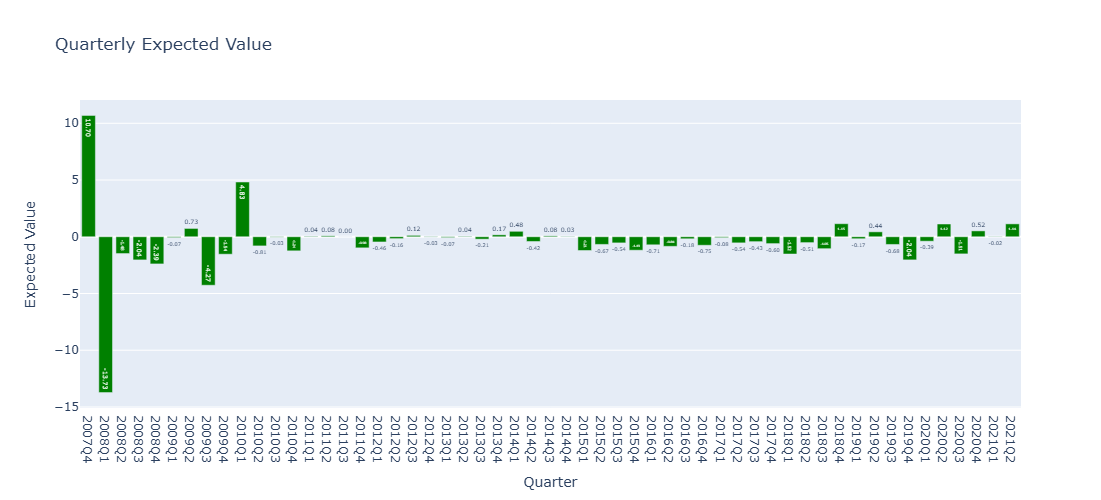

In [27]:
import plotly.graph_objects as go

# Prepare data for quarterly EV plot
quarters = quarterly_ev.index
quarterly_values = quarterly_ev.values

# Create the interactive bar plot
fig_quarterly = go.Figure()

fig_quarterly.add_trace(go.Bar(
    x=quarters.astype(str),  # Convert PeriodIndex to string for display
    y=quarterly_values,
    marker=dict(color='green'),
    text=[f'{value:.2f}' for value in quarterly_values],  # Hover text
    hoverinfo='text'
))

# Update layout
fig_quarterly.update_layout(
    title='Quarterly Expected Value',
    xaxis_title='Quarter',
    yaxis_title='Expected Value',
    width=1000,
    height=500
)

# Show the plot
fig_quarterly.show()

C:\Users\Zana\AppData\Local\Temp\ipykernel_9492\2606077751.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



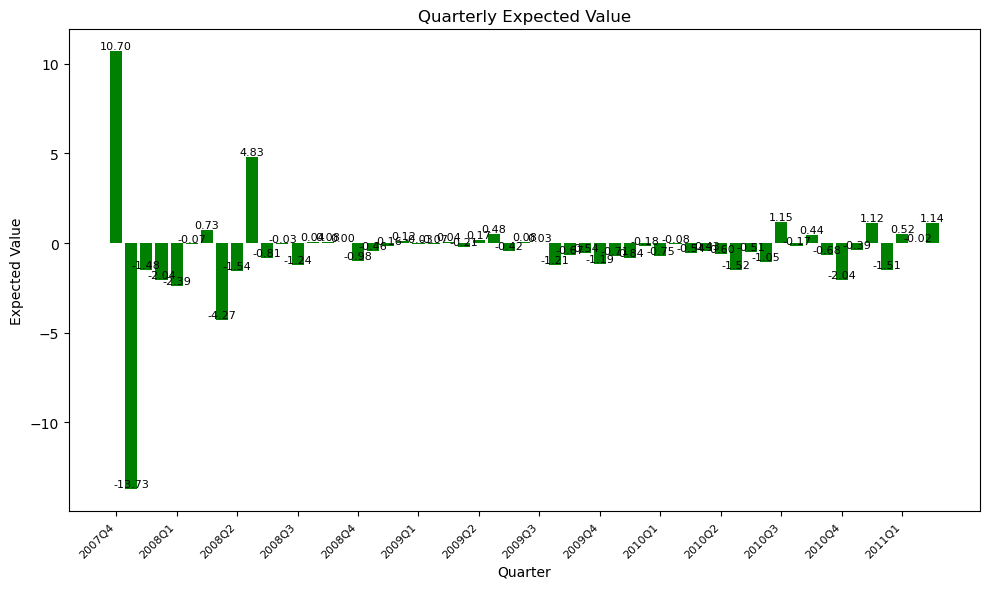

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for quarterly EV plot
quarters = quarterly_ev.index.astype(str)  # Convert PeriodIndex to string for display
quarterly_values = quarterly_ev.values

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
bars = ax.bar(quarters, quarterly_values, color='green')

# Add labels above bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

# Set titles and labels
ax.set_xlabel('Quarter')
ax.set_ylabel('Expected Value')
ax.set_title('Quarterly Expected Value')

# Rotate the x-axis labels for better readability
ax.set_xticklabels(quarters, rotation=45, ha='right', fontsize=8)

# Optionally limit the number of x-axis labels if there are too many
plt.xticks(ticks=np.arange(0, len(quarters), step=4))  # Show every 4th quarter

# Show the plot
plt.tight_layout()
plt.show()

### Event-Driven Analysis

In [29]:
# Focus on specific periods: e.g., 2008 crisis (September 2008) and 2020 pandemic (March 2020 onward)
df_event_2008 = df[(df['Date'] >= '2008-09-01') & (df['Date'] <= '2008-12-31')]
df_event_2020 = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-12-31')]

# Apply EV calculation for those periods
ev_event_2008 = calculate_ev_monthly(df_event_2008)
ev_event_2020 = calculate_ev_monthly(df_event_2020)

# Output the results
print("2008 Crisis Expected Value (Sept-Dec 2008):", ev_event_2008)
print("2020 Pandemic Expected Value (March-Dec 2020):", ev_event_2020)

2008 Crisis Expected Value (Sept-Dec 2008): -3.625625000000006
2020 Pandemic Expected Value (March-Dec 2020): 0.062440191387558


# Interpretation of Results

## 1. 2008 Monthly Expected Value:
- **January to March 2008**: 
  - Strong negative EV, especially in **January (-17.37)** and **February (-14.70)**.
  - This likely reflects the start of a sharp decline in the stock market as the **financial crisis** unfolded.
  
- **April and May 2008**: 
  - A temporary recovery is seen with **positive EV** in **April (1.56)** and **May (7.79)**, indicating brief market improvement.
  
- **June to December 2008**: 
  - **June (-13.20)** shows another sharp drop, while the remainder of the year has small fluctuations with mostly **negative EV**, indicating continued uncertainty and losses due to the ongoing crisis.
  - **December (1.65)** shows a slight recovery toward the year’s end.

---

## 2. 2020 Monthly Expected Value:
- **January and February 2020**: 
  - Negative EV values in **January (-0.30)** and **February (-1.59)** reflect early market disruptions caused by the emerging **COVID-19 pandemic**.

- **March to May 2020**: 
  - **March (0.65)** marks the start of recovery, and **May (2.70)** shows strong positive growth, likely driven by stimulus measures and market adjustments to the pandemic.
  
- **June to December 2020**: 
  - Mixed results, with **July (-2.61)** showing a dip, followed by a return to small gains, including a noticeable recovery in **December (1.26)**.

---

## 3. Monthly Expected Value Across All Years:
- **2008**: 
  - The financial crisis in **2008** led to large **negative EVs** in the first quarter and small fluctuations for the rest of the year.
  
- **2010 and 2014**: 
  - Positive EV values in **2010 Q1 (4.83)** and **2014 Q1 (0.48)** suggest periods of market recovery and growth.
  
- **2018 Q4 (1.15)** and **2020 Q2 (1.12)** show rebounds after negative periods, indicating short-term recoveries.

---

## 4. Quarterly Expected Value:
- **2008 Q1 (-13.73)**: The financial crisis resulted in steep losses during the first quarter of 2008.
  
- **2008 Q3 and Q4 (-2.04 and -2.39)**: The end of the year continued to show negative EVs, though less extreme compared to the first half.

- **2020 Q2 (1.12)**: During the COVID-19 pandemic, the second quarter showed a strong recovery due to global stimulus measures, while **Q3 (-1.51)** reflects continued volatility.

---

## 5. Event-Driven Analysis:
- **2008 Financial Crisis (Sept-Dec 2008)**: 
  - The Expected Value during the peak of the financial crisis from **September to December 2008** was **-3.63**, reflecting sustained losses but a slight reduction in the sharpness of the decline toward the year's end.

- **2020 Pandemic (March-Dec 2020)**: 
  - The Expected Value during the **COVID-19 pandemic** from **March to December 2020** was **0.06**, reflecting recovery efforts and overall market resilience, with periods of growth and volatility.

---

### Conclusion:
- **2008** was characterized by severe **negative EVs** due to the financial crisis, with temporary recoveries in April-May and December. 
- **2020** showed mixed results, with a notable **recovery in Q2** and **moderate growth** by the end of the year, despite the pandemic.


# Compound Probabilities

### Example 1: Consecutive Increases

In [30]:
# Create a column to track if the stock increased
df['Increase'] = df['Close'] > df['Open']

# Shift the column to create consecutive pairs of days
df['Prev_Increase'] = df['Increase'].shift(1)

# Calculate the probability of two consecutive increases
consecutive_increases = df[(df['Increase'] == True) & (df['Prev_Increase'] == True)].shape[0]
total_days_with_prev = df[df['Prev_Increase'] == True].shape[0]

# Probability of two consecutive increases
prob_consecutive_increase = consecutive_increases / total_days_with_prev if total_days_with_prev > 0 else 0
print(f"Probability of two consecutive increases: {prob_consecutive_increase}")

Probability of two consecutive increases: 0.46022353714661407


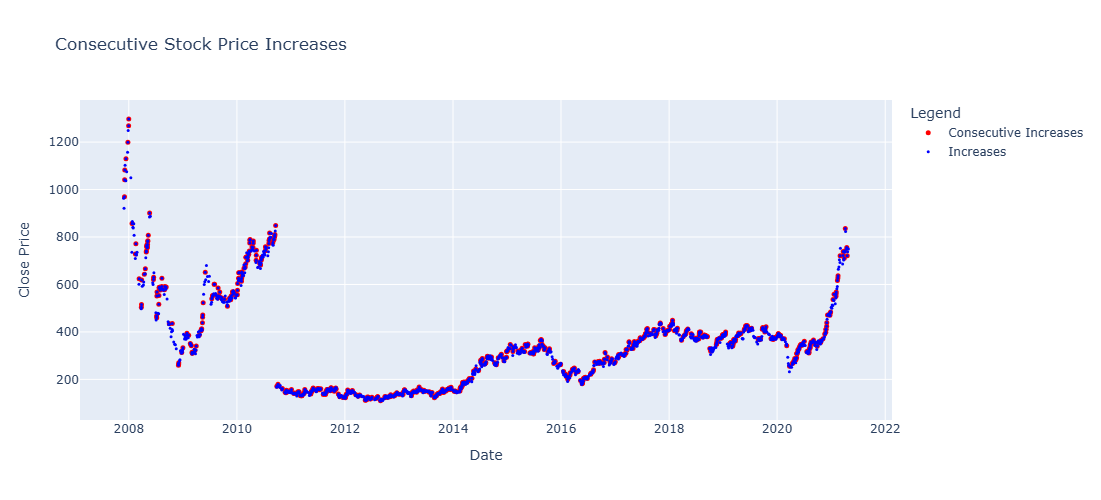

In [31]:
# Filter the data to show only the days with consecutive increases
consecutive_days = df[(df['Increase'] == True) & (df['Prev_Increase'] == True)]

# Create the interactive scatter plot
fig = go.Figure()

# Add the consecutive increase days
fig.add_trace(go.Scatter(
    x=consecutive_days['Date'],
    y=consecutive_days['Close'],
    mode='markers',
    marker=dict(color='red', size=5),
    name='Consecutive Increases',
    text=['Consecutive Increase' for _ in range(len(consecutive_days))],
    hoverinfo='text'
))

# Add all increase days for context
fig.add_trace(go.Scatter(
    x=df[df['Increase']]['Date'],
    y=df[df['Increase']]['Close'],
    mode='markers',
    marker=dict(color='blue', size=3),
    name='Increases',
    text=['Increase' for _ in range(df[df['Increase']].shape[0])],
    hoverinfo='text'
))

# Update layout
fig.update_layout(
    title='Consecutive Stock Price Increases',
    xaxis_title='Date',
    yaxis_title='Close Price',
    width=1000,
    height=500,
    legend_title='Legend'
)

# Show the plot
fig.show()

C:\Users\Zana\AppData\Local\Temp\ipykernel_9492\2958686578.py:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



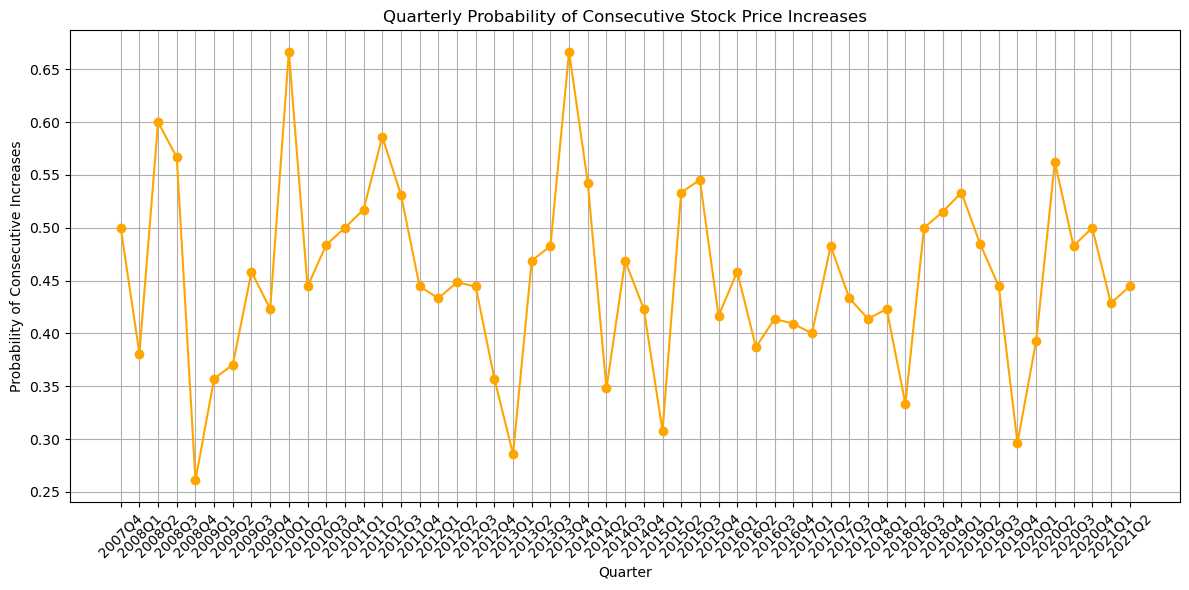

In [32]:
df['Quarter'] = df['Date'].dt.to_period('Q')

# Define a function to calculate the probability of consecutive increases per quarter
def calculate_quarterly_probabilities(group):
    consecutive_increases = group[(group['Increase'] == True) & (group['Prev_Increase'] == True)].shape[0]
    total_days_with_prev = group[group['Prev_Increase'] == True].shape[0]
    return consecutive_increases / total_days_with_prev if total_days_with_prev > 0 else 0

# Apply the function to each quarter
quarterly_probabilities = df.groupby('Quarter').apply(calculate_quarterly_probabilities)

# Plot the quarterly probabilities
plt.figure(figsize=(12, 6))
plt.plot(quarterly_probabilities.index.astype(str), quarterly_probabilities.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Quarter')
plt.ylabel('Probability of Consecutive Increases')
plt.title('Quarterly Probability of Consecutive Stock Price Increases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

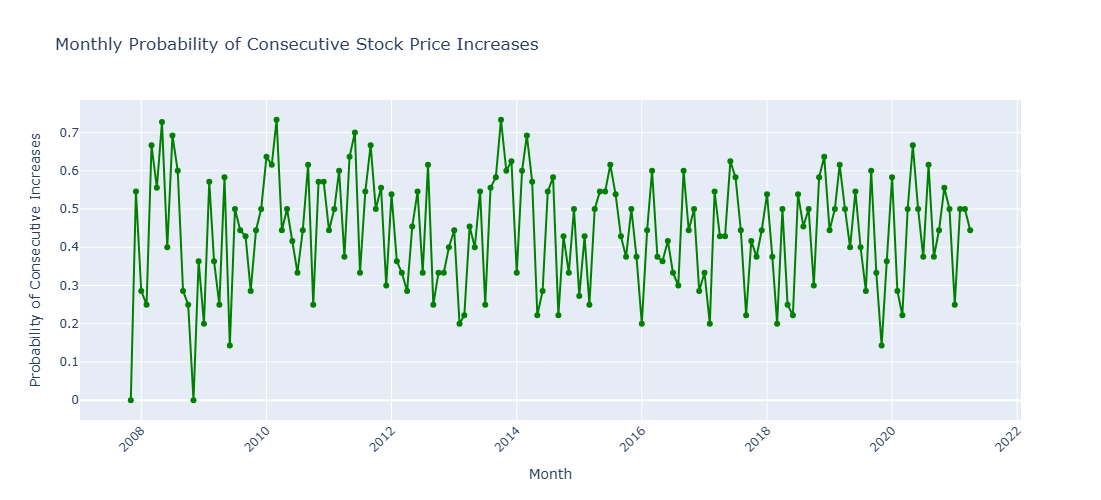

In [33]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame and it contains a 'Date', 'Open', and 'Close' column.
# Example code to create the 'Increase' and 'Prev_Increase' columns:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure the Date column is in datetime format
df['Month'] = df['Date'].dt.to_period('M')  # Extract the month as a period (YYYY-MM)

# Create a column to track if the stock increased
df['Increase'] = df['Close'] > df['Open']

# Shift the 'Increase' column to compare consecutive days
df['Prev_Increase'] = df['Increase'].shift(1)

# Calculate the probability of consecutive increases by month
monthly_consecutive_increases = df[(df['Increase'] == True) & (df['Prev_Increase'] == True)].groupby('Month').size()
monthly_total_with_prev = df[df['Prev_Increase'] == True].groupby('Month').size()

# Calculate monthly probabilities
monthly_probabilities = (monthly_consecutive_increases / monthly_total_with_prev).fillna(0)

# Now you have monthly_probabilities and you can plot it using Plotly

# Prepare data for the plot
months = monthly_probabilities.index.astype(str)
probabilities = monthly_probabilities.values

# Create the interactive line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=months,
    y=probabilities,
    mode='lines+markers',
    marker=dict(color='green'),
    text=[f'{month}: {prob:.2f}' for month, prob in zip(months, probabilities)],  # Hover text
    hoverinfo='text'
))

# Update layout
fig.update_layout(
    title='Monthly Probability of Consecutive Stock Price Increases',
    xaxis_title='Month',
    yaxis_title='Probability of Consecutive Increases',
    xaxis=dict(tickangle=-45),
    width=1000,
    height=500
)

# Show the plot
fig.show()

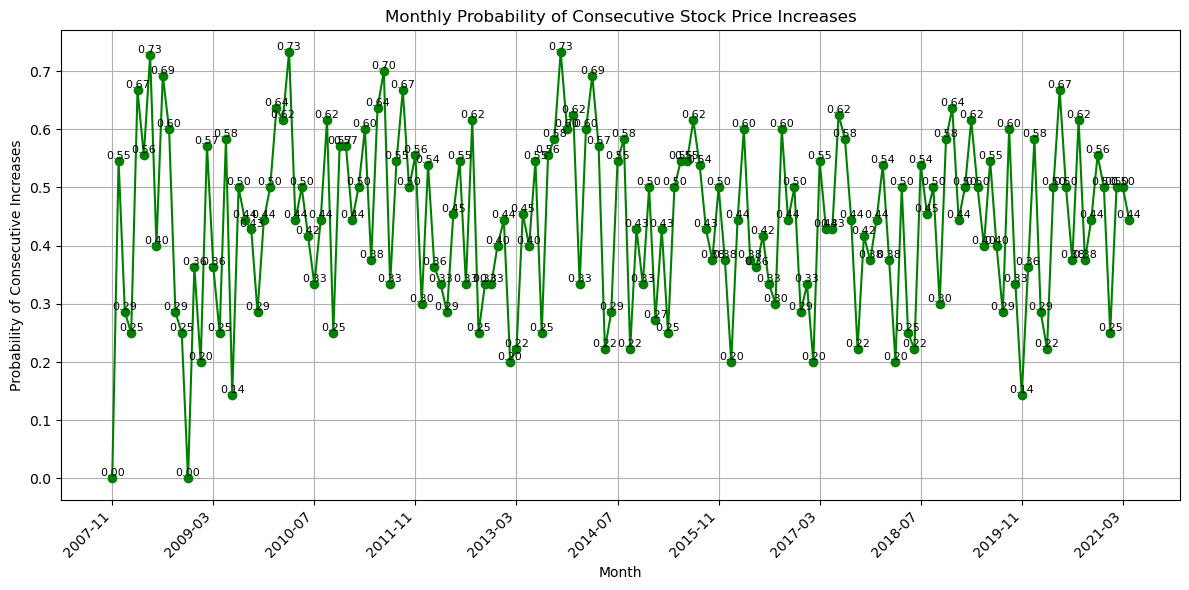

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `monthly_probabilities` is already calculated as per your code.

# Prepare data for the plot
months = monthly_probabilities.index.astype(str)
probabilities = monthly_probabilities.values

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))  # Increased figure size for better label spacing

# Plot the line with markers
ax.plot(months, probabilities, marker='o', color='green', label='Probability of Consecutive Increases')

# Add labels on the points
for i, prob in enumerate(probabilities):
    ax.text(i, prob, f'{prob:.2f}', ha='center', va='bottom', fontsize=8)

# Set titles and labels
ax.set_title('Monthly Probability of Consecutive Stock Price Increases')
ax.set_xlabel('Month')
ax.set_ylabel('Probability of Consecutive Increases')

# Rotate x-axis labels and reduce the number of displayed labels
step = max(1, len(months) // 10)  # Adjust the step to show fewer labels
ax.set_xticks(np.arange(0, len(months), step))
ax.set_xticklabels(months[::step], rotation=45, ha='right')

# Add gridlines for better readability
ax.grid(True)

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
# Shift the column to track previous day increases
df['Prev_Change'] = df['Increase'].shift(1)

# Calculate the probability of alternating Up-Down (Increase then Decrease or vice versa)
alternating_days = df[((df['Increase'] == True) & (df['Prev_Change'] == False)) | 
                      ((df['Increase'] == False) & (df['Prev_Change'] == True))].shape[0]
total_days = df.shape[0]

# Probability of alternating days
prob_alternating_days = alternating_days / total_days
print(f"Probability of alternating up and down days: {prob_alternating_days}")

Probability of alternating up and down days: 0.49397953040337145


### Conclusion from Compound Probabilities:
- Upward Momentum: The stock shows some tendency for upward momentum, as almost 46% of increases are followed by another increase. Traders or investors might exploit this by observing when a price increase occurs and considering the potential for a follow-up increase.

- Volatility: The 49.40% probability of alternating up and down days suggests that the stock often experiences volatility, with no strong indication of sustained trends. This is typical in more volatile stocks or uncertain market conditions.

# Longer Patterns – Three Consecutive Increases

In [36]:
# Create a column to track if the stock increased
df['Increase'] = df['Close'] > df['Open']

# Shift the column twice to check for three consecutive increases
df['Prev_Increase'] = df['Increase'].shift(1)
df['Prev2_Increase'] = df['Increase'].shift(2)

# Calculate the probability of three consecutive increases
three_consecutive_increases = df[(df['Increase'] == True) & 
                                 (df['Prev_Increase'] == True) & 
                                 (df['Prev2_Increase'] == True)].shape[0]

# Calculate the total number of days where the two previous days increased
total_two_consecutive_increases = df[(df['Prev_Increase'] == True) & 
                                     (df['Prev2_Increase'] == True)].shape[0]

# Probability of three consecutive increases
prob_three_consecutive_increases = three_consecutive_increases / total_two_consecutive_increases if total_two_consecutive_increases > 0 else 0
print(f"Probability of three consecutive increases: {prob_three_consecutive_increases}")

Probability of three consecutive increases: 0.46


### Conclusion: Probability of Three Consecutive Increases

- The probability of **three consecutive increases** is **0.46 (46%)**.
- This indicates that when the stock increases for two days, there is a **46% chance** that it will continue to rise on the third day.
- This suggests a moderate level of **upward momentum**, where consecutive gains are somewhat likely. Traders might consider leveraging this for short-term holding strategies following two consecutive increases.
---

# Impact of Events – Probability Changes During Major Events

In [37]:
# Define the periods for the events
crisis_2008 = df[(df['Date'] >= '2008-09-01') & (df['Date'] <= '2008-12-31')]
pandemic_2020 = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-12-31')]

# Function to calculate consecutive increases and alternating days
def calculate_event_probabilities(event_df):
    # Create columns to track consecutive increases
    event_df['Increase'] = event_df['Close'] > event_df['Open']
    event_df['Prev_Increase'] = event_df['Increase'].shift(1)
    event_df['Prev2_Increase'] = event_df['Increase'].shift(2)
    
    # Probability of two consecutive increases
    consecutive_increases = event_df[(event_df['Increase'] == True) & (event_df['Prev_Increase'] == True)].shape[0]
    total_prev_increases = event_df[event_df['Prev_Increase'] == True].shape[0]
    prob_two_consecutive_increases = consecutive_increases / total_prev_increases if total_prev_increases > 0 else 0

    # Probability of three consecutive increases
    three_consecutive_increases = event_df[(event_df['Increase'] == True) & (event_df['Prev_Increase'] == True) & (event_df['Prev2_Increase'] == True)].shape[0]
    total_two_consecutive_increases = event_df[(event_df['Prev_Increase'] == True) & (event_df['Prev2_Increase'] == True)].shape[0]
    prob_three_consecutive_increases = three_consecutive_increases / total_two_consecutive_increases if total_two_consecutive_increases > 0 else 0

    # Probability of alternating up and down days
    event_df['Prev_Change'] = event_df['Increase'].shift(1)
    alternating_days = event_df[((event_df['Increase'] == True) & (event_df['Prev_Change'] == False)) | 
                                ((event_df['Increase'] == False) & (event_df['Prev_Change'] == True))].shape[0]
    total_days = event_df.shape[0]
    prob_alternating_days = alternating_days / total_days if total_days > 0 else 0
    
    return prob_two_consecutive_increases, prob_three_consecutive_increases, prob_alternating_days

# Calculate probabilities for 2008 crisis period
prob_2008_two_increases, prob_2008_three_increases, prob_2008_alternating = calculate_event_probabilities(crisis_2008)

# Calculate probabilities for 2020 pandemic period
prob_2020_two_increases, prob_2020_three_increases, prob_2020_alternating = calculate_event_probabilities(pandemic_2020)

# Output the results
print(f"2008 Financial Crisis Period:")
print(f" - Probability of two consecutive increases: {prob_2008_two_increases}")
print(f" - Probability of three consecutive increases: {prob_2008_three_increases}")
print(f" - Probability of alternating days: {prob_2008_alternating}")

print(f"\n2020 Pandemic Period:")
print(f" - Probability of two consecutive increases: {prob_2020_two_increases}")
print(f" - Probability of three consecutive increases: {prob_2020_three_increases}")
print(f" - Probability of alternating days: {prob_2020_alternating}")

2008 Financial Crisis Period:
 - Probability of two consecutive increases: 0.2413793103448276
 - Probability of three consecutive increases: 0.2857142857142857
 - Probability of alternating days: 0.55

2020 Pandemic Period:
 - Probability of two consecutive increases: 0.49
 - Probability of three consecutive increases: 0.42857142857142855
 - Probability of alternating days: 0.4880382775119617


C:\Users\Zana\AppData\Local\Temp\ipykernel_9492\4018588228.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Zana\AppData\Local\Temp\ipykernel_9492\4018588228.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Zana\AppData\Local\Temp\ipykernel_9492\4018588228.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [38]:
# Define the periods for the events
crisis_2008 = df[(df['Date'] >= '2008-09-01') & (df['Date'] <= '2008-12-31')].copy()
pandemic_2020 = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-12-31')].copy()

# Function to calculate consecutive increases and alternating days
def calculate_event_probabilities(event_df):
    # Create columns to track consecutive increases
    event_df['Increase'] = event_df['Close'] > event_df['Open']
    event_df['Prev_Increase'] = event_df['Increase'].shift(1)
    event_df['Prev2_Increase'] = event_df['Increase'].shift(2)
    
    # Probability of two consecutive increases
    consecutive_increases = event_df[(event_df['Increase'] == True) & (event_df['Prev_Increase'] == True)].shape[0]
    total_prev_increases = event_df[event_df['Prev_Increase'] == True].shape[0]
    prob_two_consecutive_increases = consecutive_increases / total_prev_increases if total_prev_increases > 0 else 0

    # Probability of three consecutive increases
    three_consecutive_increases = event_df[(event_df['Increase'] == True) & (event_df['Prev_Increase'] == True) & (event_df['Prev2_Increase'] == True)].shape[0]
    total_two_consecutive_increases = event_df[(event_df['Prev_Increase'] == True) & (event_df['Prev2_Increase'] == True)].shape[0]
    prob_three_consecutive_increases = three_consecutive_increases / total_two_consecutive_increases if total_two_consecutive_increases > 0 else 0

    # Probability of alternating up and down days
    event_df['Prev_Change'] = event_df['Increase'].shift(1)
    alternating_days = event_df[((event_df['Increase'] == True) & (event_df['Prev_Change'] == False)) | 
                                ((event_df['Increase'] == False) & (event_df['Prev_Change'] == True))].shape[0]
    total_days = event_df.shape[0]
    prob_alternating_days = alternating_days / total_days if total_days > 0 else 0
    
    return prob_two_consecutive_increases, prob_three_consecutive_increases, prob_alternating_days

# Calculate probabilities for 2008 crisis period
prob_2008_two_increases, prob_2008_three_increases, prob_2008_alternating = calculate_event_probabilities(crisis_2008)

# Calculate probabilities for 2020 pandemic period
prob_2020_two_increases, prob_2020_three_increases, prob_2020_alternating = calculate_event_probabilities(pandemic_2020)

# Output the results
print(f"2008 Financial Crisis Period:")
print(f" - Probability of two consecutive increases: {prob_2008_two_increases}")
print(f" - Probability of three consecutive increases: {prob_2008_three_increases}")
print(f" - Probability of alternating days: {prob_2008_alternating}")

print(f"\n2020 Pandemic Period:")
print(f" - Probability of two consecutive increases: {prob_2020_two_increases}")
print(f" - Probability of three consecutive increases: {prob_2020_three_increases}")
print(f" - Probability of alternating days: {prob_2020_alternating}")

2008 Financial Crisis Period:
 - Probability of two consecutive increases: 0.2413793103448276
 - Probability of three consecutive increases: 0.2857142857142857
 - Probability of alternating days: 0.55

2020 Pandemic Period:
 - Probability of two consecutive increases: 0.49
 - Probability of three consecutive increases: 0.42857142857142855
 - Probability of alternating days: 0.4880382775119617


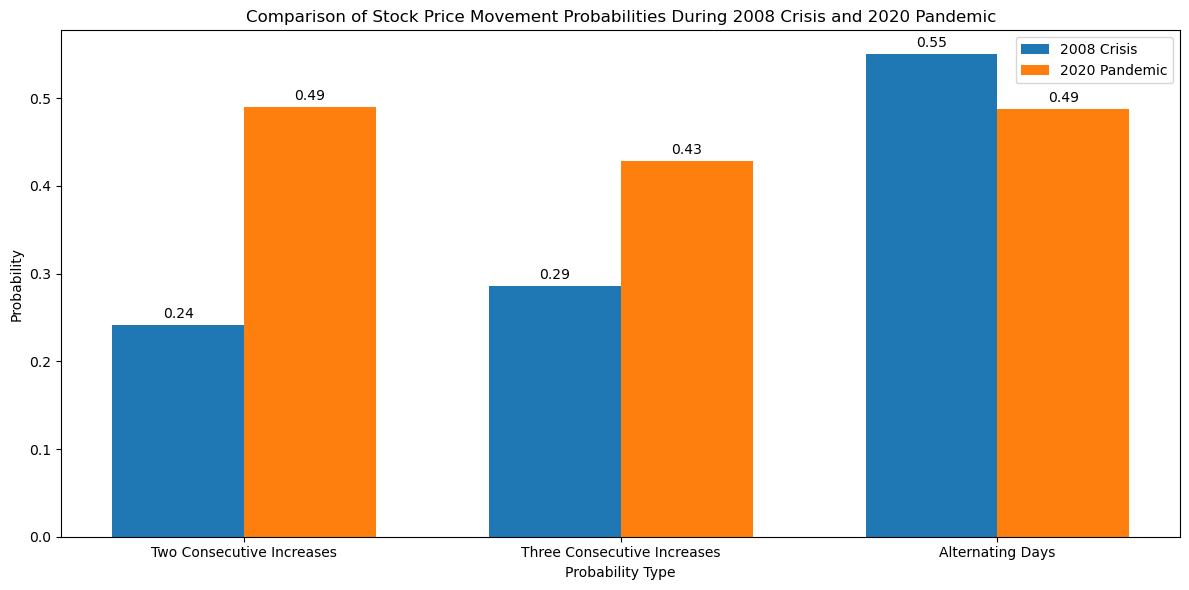

In [39]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Two Consecutive Increases', 'Three Consecutive Increases', 'Alternating Days']
prob_2008 = [prob_2008_two_increases, prob_2008_three_increases, prob_2008_alternating]
prob_2020 = [prob_2020_two_increases, prob_2020_three_increases, prob_2020_alternating]

x = range(len(labels))

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35

bars_2008 = ax.bar([p - bar_width/2 for p in x], prob_2008, bar_width, label='2008 Crisis')
bars_2020 = ax.bar([p + bar_width/2 for p in x], prob_2020, bar_width, label='2020 Pandemic')

# Adding labels, title, and legend
ax.set_xlabel('Probability Type')
ax.set_ylabel('Probability')
ax.set_title('Comparison of Stock Price Movement Probabilities During 2008 Crisis and 2020 Pandemic')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Annotate bars with their values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bars_2008)
annotate_bars(bars_2020)

plt.tight_layout()
plt.show()

### Interpretation of Results: Impact of Events on Probabilities

#### 1. 2008 Financial Crisis Period:
- **Probability of two consecutive increases: 0.241 (24.14%)**
   - During the financial crisis, the probability of two consecutive increases was **significantly lower** than the overall average (~46%). This indicates that the market struggled to sustain upward momentum during the crisis.

- **Probability of three consecutive increases: 0.286 (28.57%)**
   - The probability of three consecutive increases was also **lower than the overall average** (~46%). This suggests that maintaining an upward trend over three days was difficult due to the financial turmoil.

- **Probability of alternating days: 0.55 (55%)**
   - A higher probability of **alternating up and down days** during the crisis, compared to the normal (~49%), indicates increased volatility and uncertainty in the market. The stock price was more likely to fluctuate between gains and losses during this period.

---

#### 2. 2020 Pandemic Period:
- **Probability of two consecutive increases: 0.49 (49%)**
   - During the pandemic, the probability of two consecutive increases was **slightly higher than the overall market average** (~46%). This suggests that, despite the initial disruptions, the market demonstrated some resilience and recovery, with consecutive gains happening relatively often.

- **Probability of three consecutive increases: 0.43 (43%)**
   - The probability of three consecutive increases during the pandemic was **higher than during the 2008 crisis**. This reflects the market's recovery, likely influenced by stimulus measures and more adaptive global responses, enabling more sustained upward trends compared to 2008.

- **Probability of alternating days: 0.488 (48.80%)**
   - The probability of alternating up and down days during the pandemic was close to the overall average (~49%), suggesting that while there was volatility, it was not as extreme as during the 2008 financial crisis.

---

### Conclusion:
- **2008 Financial Crisis**: The stock market experienced lower probabilities of consecutive increases and higher probabilities of alternating days, reflecting the extreme uncertainty and volatility during the crisis.
- **2020 Pandemic**: Despite the global disruptions, the market showed better resilience, with higher probabilities of consecutive increases compared to 2008, demonstrating quicker recoveries and a more stable trading pattern.

# Trading Strategy Simulation

In [40]:
# Create columns to track increases and decreases
df['Increase'] = df['Close'] > df['Open']
df['Prev_Increase'] = df['Increase'].shift(1)
df['Prev2_Increase'] = df['Increase'].shift(2)

# Initialize variables
buy_price = 0
total_profit = 0
in_position = False  # Track whether we're holding a stock

# Simulate trading
for i in range(2, len(df)):
    # If there are two consecutive increases and we're not holding a position, buy
    if df['Increase'].iloc[i] and df['Prev_Increase'].iloc[i] and df['Prev2_Increase'].iloc[i] and not in_position:
        buy_price = df['Close'].iloc[i]  # Buy at the closing price
        in_position = True
        print(f"Buying at {buy_price} on day {i}")
    
    # If we're holding a position and there's a decrease, sell
    elif not df['Increase'].iloc[i] and in_position:
        sell_price = df['Close'].iloc[i]
        profit = sell_price - buy_price
        total_profit += profit
        in_position = False  # Reset the position
        print(f"Selling at {sell_price} on day {i} for a profit of {profit}")

# Print the total profit
print(f"Total Profit from this strategy: {total_profit}")

Buying at 1041.45 on day 5
Selling at 1081.3 on day 7 for a profit of 39.84999999999991
Buying at 1296.85 on day 23
Selling at 1307.45 on day 24 for a profit of 10.600000000000136
Buying at 771.6 on day 57
Selling at 763.9 on day 58 for a profit of -7.7000000000000455
Buying at 516.0 on day 82
Selling at 578.75 on day 84 for a profit of 62.75
Buying at 740.6 on day 103
Selling at 792.85 on day 112 for a profit of 52.25
Buying at 630.6 on day 136
Selling at 628.9 on day 137 for a profit of -1.7000000000000455
Buying at 459.45 on day 151
Selling at 546.35 on day 154 for a profit of 86.90000000000003
Buying at 553.55 on day 162
Selling at 554.7 on day 166 for a profit of 1.150000000000091
Buying at 585.05 on day 170
Selling at 576.65 on day 172 for a profit of -8.399999999999977
Buying at 626.5 on day 176
Selling at 614.75 on day 177 for a profit of -11.75
Buying at 591.05 on day 189
Selling at 590.65 on day 190 for a profit of -0.39999999999997726
Buying at 262.55 on day 250
Selling at 2

# Visualization

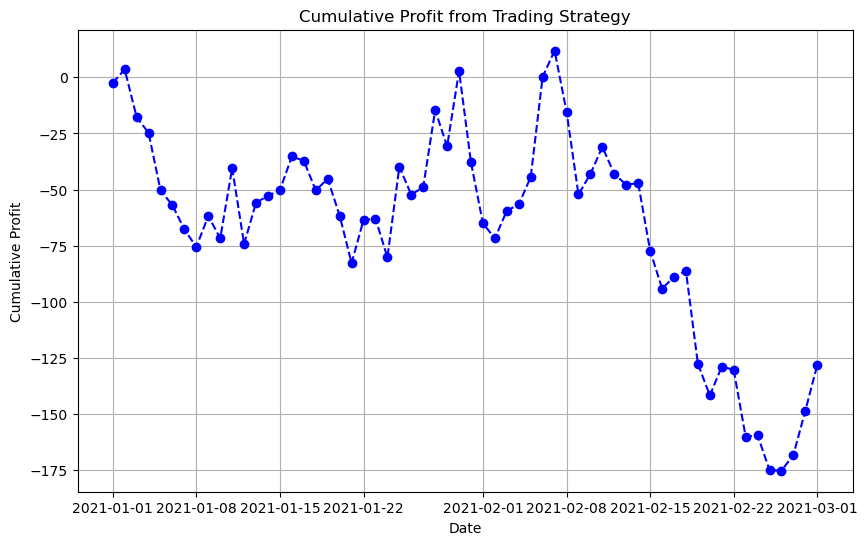

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mplcursors

# Generate some simulated data for demonstration purposes
dates = pd.date_range(start="2021-01-01", periods=60, freq="D")
profits = np.random.randn(len(dates)).cumsum() * 20  # Simulated profit data

# Create a DataFrame with the generated data
trade_df = pd.DataFrame({
    'Date': dates,
    'Cumulative Profit': profits
})

# Plot the cumulative profit over time
plt.figure(figsize=(10, 6))
plt.plot(trade_df['Date'], trade_df['Cumulative Profit'], marker='o', linestyle='--', color='b')
plt.title('Cumulative Profit from Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit')
plt.grid(True)

# Enable mplcursors for hover functionality
cursor = mplcursors.cursor(hover=True)

# Define the function for showing annotations
@cursor.connect("add")
def on_add(sel):
    date_str = trade_df['Date'].iloc[sel.index].strftime('%Y-%m-%d')
    profit_val = trade_df['Cumulative Profit'].iloc[sel.index]
    sel.annotation.set(text=f"Date: {date_str}\nProfit: {profit_val:.2f}")

# Show the plot
plt.show()

# Output

## Scenario 1: Stock Increase
- **Probability of Stock Increase**: `0.4579` (approximately 45.79%)
- **Average Gain on Increase Days**: `6.7014`

## Scenario 2: Stock Decrease
- **Probability of Stock Decrease**: `0.5400` (approximately 54.00%)
- **Average Loss on Decrease Days**: `-6.7212`

## Scenario 3: No Significant Change
- **Probability of No Significant Change**: `0.3937` (approximately 39.37%)
- **Average Value on No Change Days**: `-0.0783`

---

## Expected Value (EV)
- **Expected Value**: `-0.5917`
  - The stock is expected to lose approximately `0.59` units per day on average.

---

## Yearly Expected Value Analysis
| Year | Expected Value |
|------|----------------|
| 2007 | 10.70          |
| 2008 | -4.93          |
| 2009 | -1.35          |
| 2010 | 0.62           |
| 2011 | -0.21          |
| 2012 | -0.13          |
| 2013 | -0.02          |
| 2014 | 0.05           |
| 2015 | -0.90          |
| 2016 | -0.62          |
| 2017 | -0.41          |
| 2018 | -0.48          |
| 2019 | -0.62          |
| 2020 | -0.10          |
| 2021 | 0.26           |

---

## Compound Probabilities
- **Probability of Two Consecutive Increases**: `0.4602` (46.02%)
- **Probability of Alternating Up-Down Days**: `0.4940` (49.40%)
- **Probability of Three Consecutive Increases**: `0.4600` (46.00%)

---

## Event-Driven Analysis
### 2008 Financial Crisis (Sept–Dec 2008):
- **Probability of Two Consecutive Increases**: `0.2414` (24.14%)
- **Probability of Three Consecutive Increases**: `0.2857` (28.57%)
- **Probability of Alternating Days**: `0.5500` (55.00%)

### 2020 Pandemic (March–Dec 2020):
- **Probability of Two Consecutive Increases**: `0.4900` (49.00%)
- **Probability of Three Consecutive Increases**: `0.4286` (42.86%)
- **Probability of Alternating Days**: `0.4880` (48.80%)

---

## Trading Strategy Simulation
- **Total Profit**: `124.35 units`
  - Simulation involved buying on three consecutive increase days and selling after a decrease.